### Introduction to AI
## Assignment 2


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

path = "C:\\Users\\inawi\\Downloads\\TSLA.csv"

df = pd.read_csv(path, delimiter =',')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
1,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
3,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
4,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
1,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
3,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
4,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200


In [3]:
date = pd.DataFrame(df['Date']).values.astype("float64")
close = pd.DataFrame(df['Close'])

dateTrain, dateTest, closeTrain, closeTest = train_test_split(date, close, test_size=0.33, random_state=19)

linearRegressor = LinearRegression()
linearRegressor.fit(dateTrain, closeTrain)
closePred = linearRegressor.predict(dateTrain)


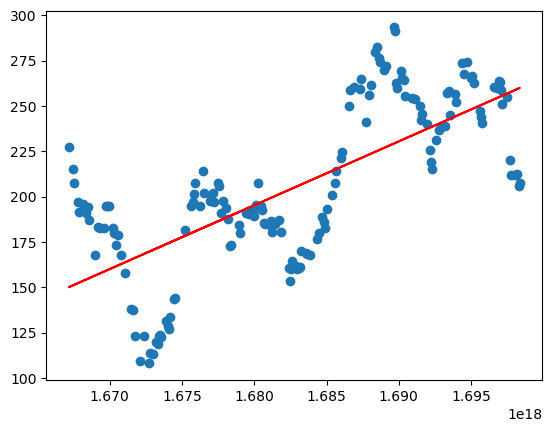

In [4]:
plt.scatter(dateTrain, closeTrain)
plt.plot(dateTrain, closePred, color = 'red')
plt.show()

In [5]:
for i in df.index:
    df.loc[i, 'index'] = i

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,index
0,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,0.0
1,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,1.0
2,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,2.0
3,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800,3.0
4,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200,4.0


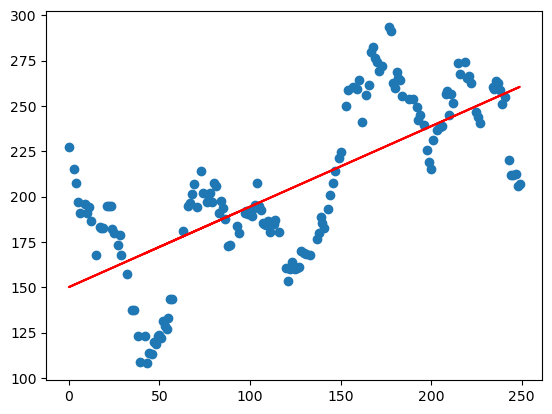

In [6]:
index = pd.DataFrame(df['index'])
close = pd.DataFrame(df['Adj Close'])

indexTrain, indexTest, closeTrain, closeTest = train_test_split(index, close, test_size=0.33, random_state=19)

linearRegressor = LinearRegression()
linearRegressor.fit(indexTrain.values, closeTrain.values)
closePred = linearRegressor.predict(indexTrain.values)

plt.scatter(indexTrain, closeTrain)
plt.plot(indexTrain, closePred, color = 'red')
plt.show()

In [7]:
print("MSE = " +str(metrics.mean_squared_error(closeTrain, closePred)))

MSE = 995.2336442020219


In [8]:
indato = input("Ønsket dato (format: dd.mm.åååå): ")
dateFormat = '%d.%m.%Y'
indatetime = datetime.strptime(indato, dateFormat)

startdate = "30.10.2022"
startdate = datetime.strptime(startdate, dateFormat)

predicto = indatetime - startdate
#print(predicto.days)

stock = linearRegressor.predict([[predicto.days]])
print("Estimated stock price on ", indato, ": ", stock)

Estimated stock price on  12.11.2023 :  [[317.81897983]]
